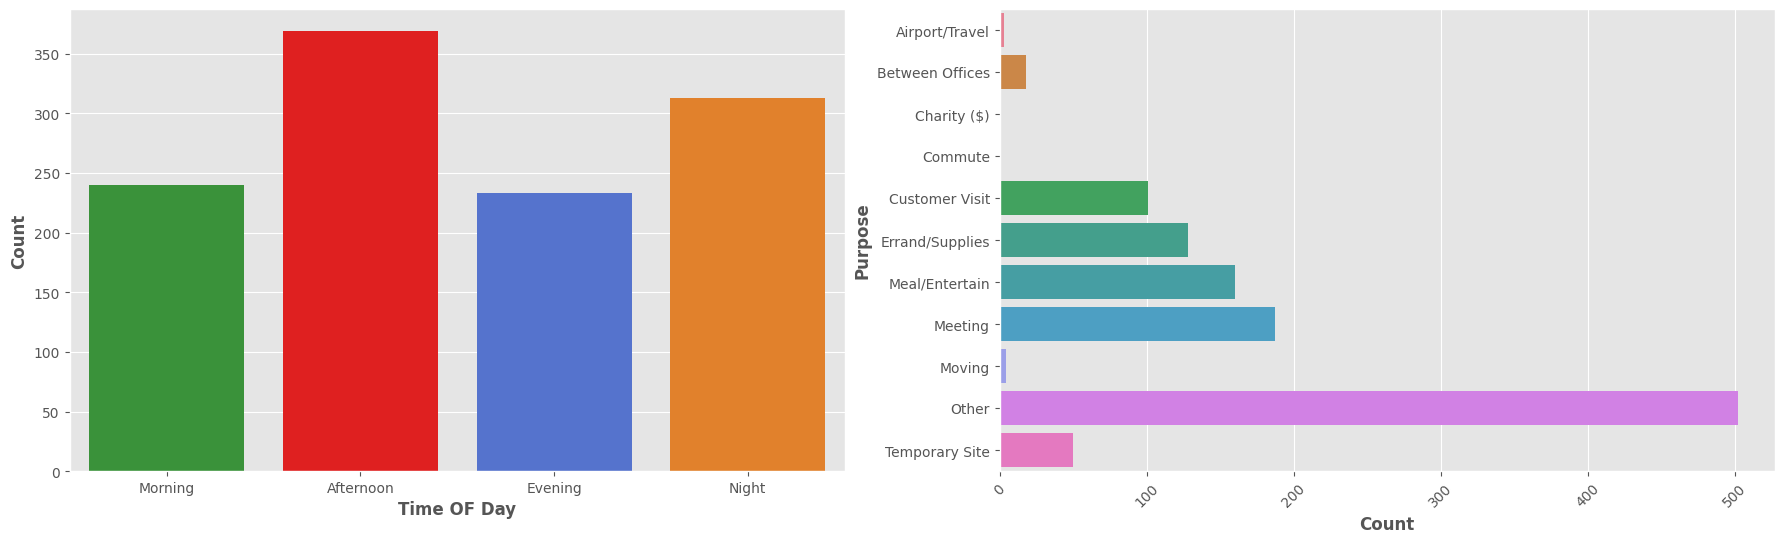

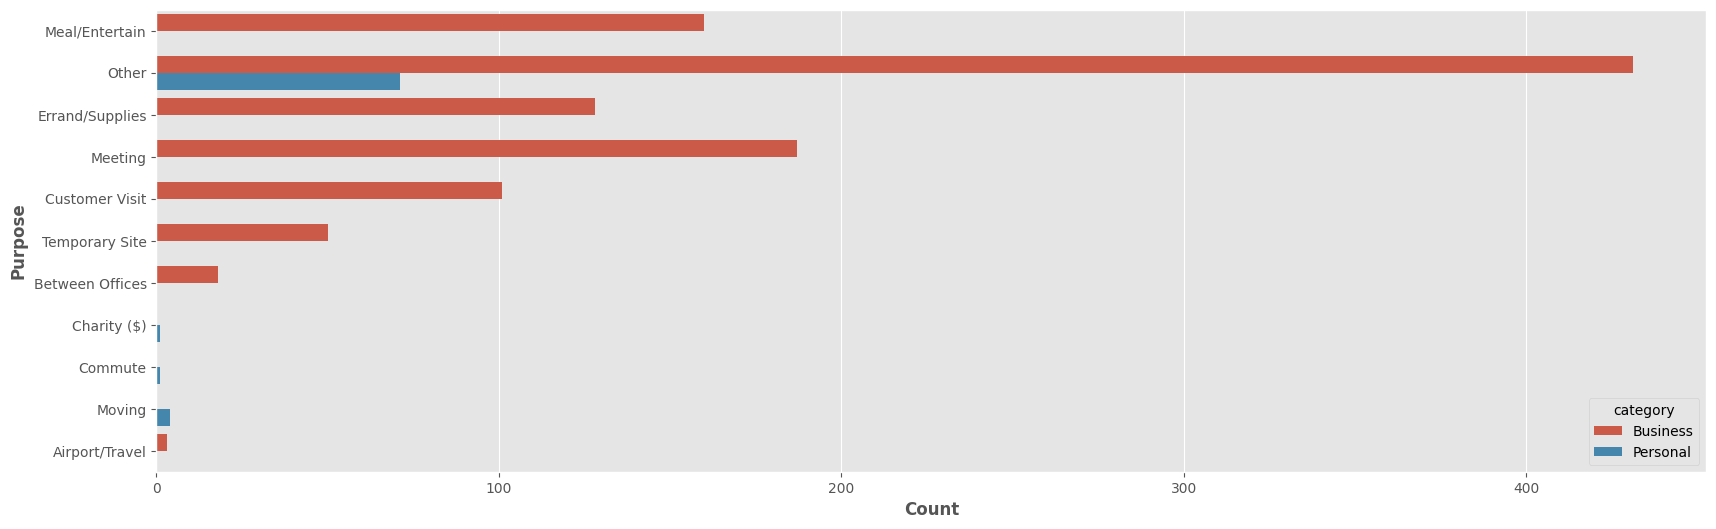

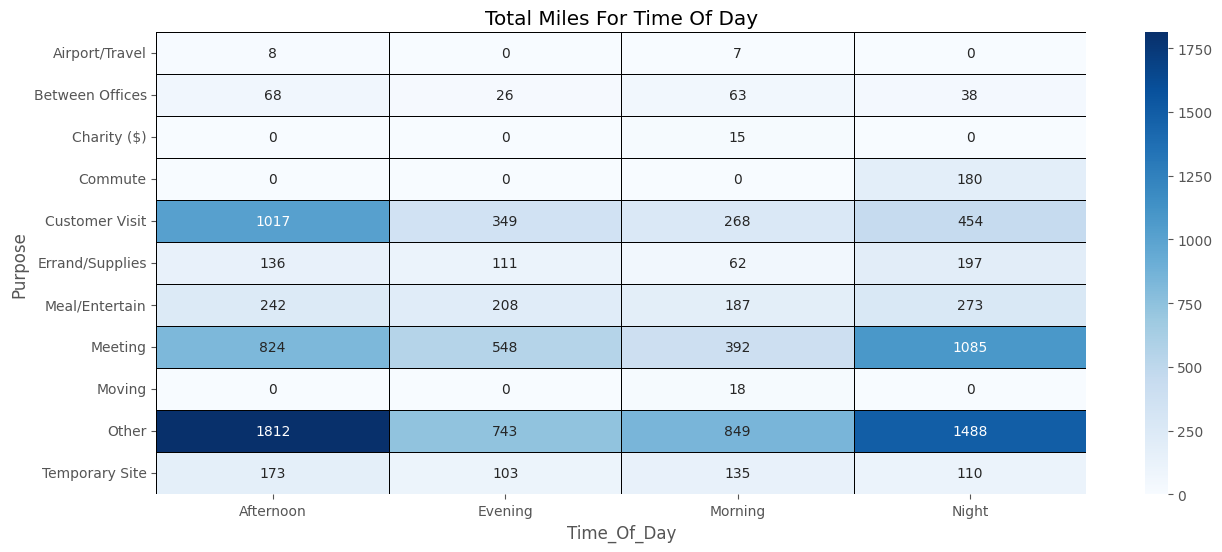

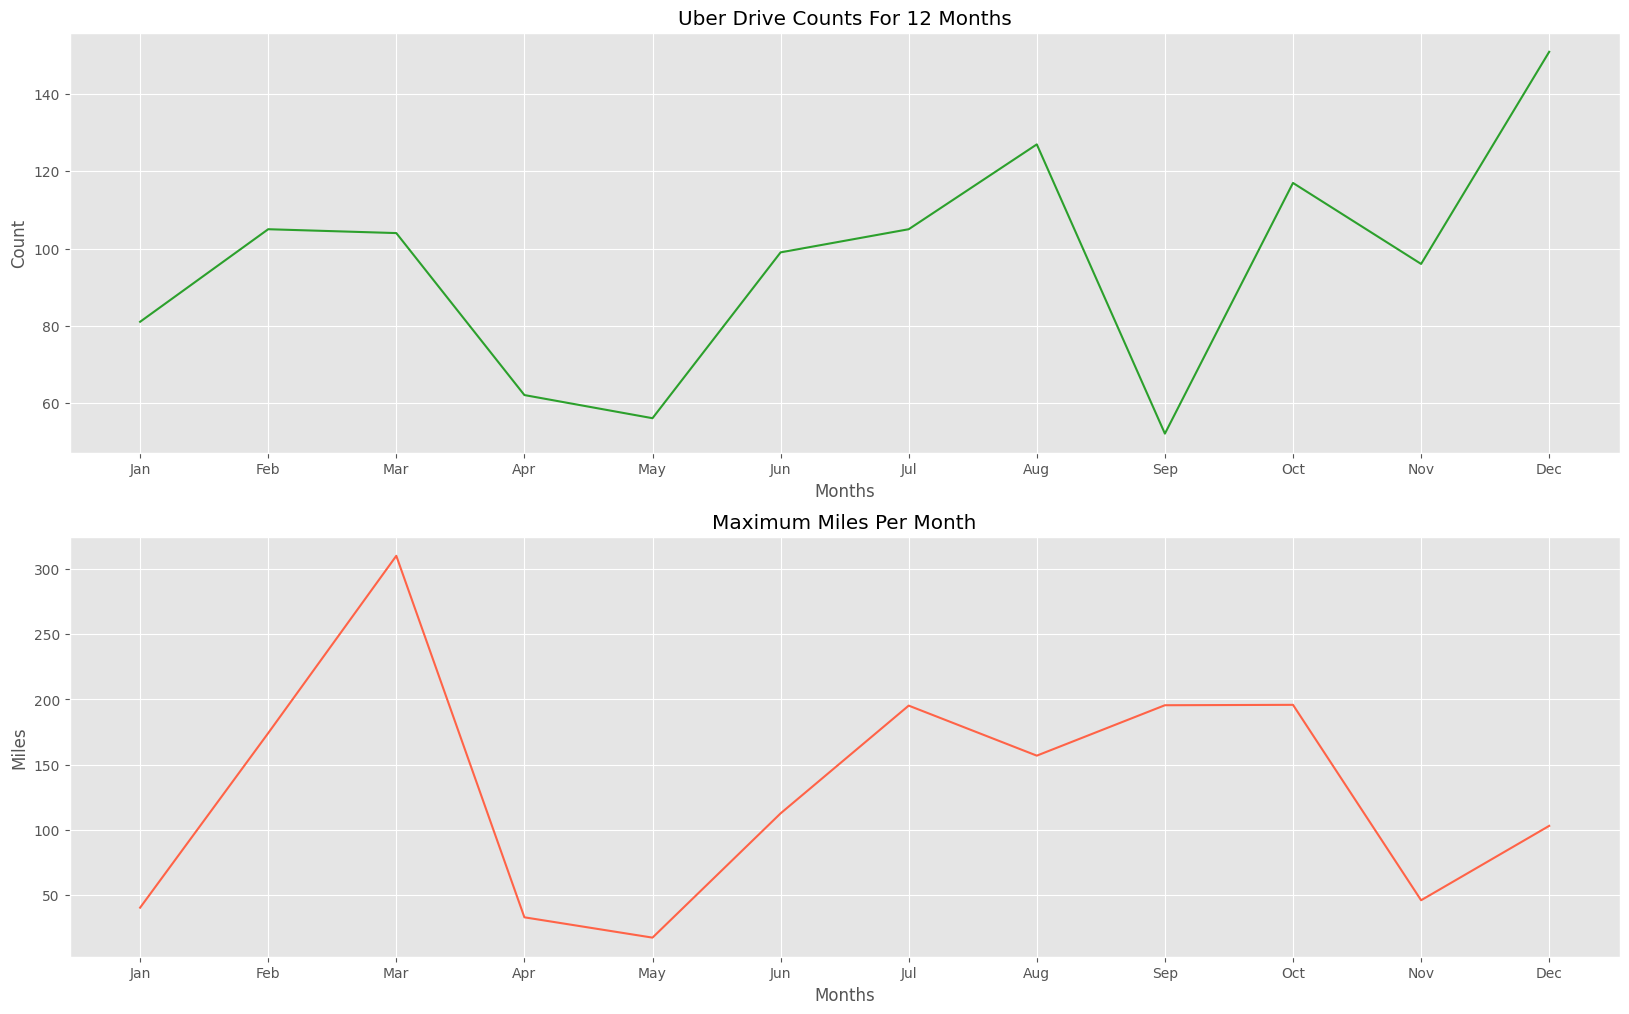

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator as ML , ScalarFormatter as SF
from collections import Counter
import itertools as iter

uber_csv = pd.read_csv(r'F:\Documents\Datacamp\Associate Data Analysis Python Datacamp\GeeksForGeeks Data Analysis Projects\Uber Rides\UberDataset.csv')

uber_df = pd.DataFrame(uber_csv)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
# Piece of code to change the header case to lowercase

uber_df.columns = map(str.lower, uber_df.columns)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
uber_df.drop(index=1155 , axis=1, inplace= True)


# Changing the str object to datetime format and also fixing mixed string formats. 

uber_df['start_date'] = np.where(uber_df['start_date'].str.contains('/'), 
                                    pd.to_datetime(uber_df['start_date'], format= 'mixed', errors='coerce', dayfirst= True), 
                                    pd.to_datetime(uber_df['start_date'], format= 'mixed', dayfirst= True))

uber_df['end_date'] = np.where(uber_df['end_date'].str.contains('/'), 
                               pd.to_datetime(uber_df['end_date'], format= 'mixed', errors='coerce', dayfirst= True), 
                               pd.to_datetime(uber_df['end_date'], format= 'mixed', dayfirst= True))


# Changing the missing values in the purpose column to Other

uber_df['purpose'] = np.where(uber_df['purpose'].isnull(), 'Other', uber_df['purpose'])



# Extracting the hour from Start Date to check when uber drivers are most active during the day. 

hours = []

for hour in uber_df['start_date'].dt.hour:
     hours.append(hour)

def extraction(hour):
        if hour > 5 and hour < 12:
            return 'Morning'
        elif hour > 12 and hour < 17:
            return 'Afternoon'
        elif hour > 17 and hour < 21:
            return 'Evening'
        else:
            return 'Night' 
        

        
# Adding a column for time of day for all uber drives. 

uber_df['time_of_day'] = [i for i in hours]

uber_df['time_of_day'] = uber_df['time_of_day'].apply(extraction)

# Adding the months for all Uber drives. 

uber_df['month'] = uber_df['start_date'].dt.month_name()

uber_df['month'] = uber_df['month'].str.slice(0,3)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX



#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

tod = uber_df.groupby('time_of_day', as_index= False)['start_date'].count()
purpose = uber_df.groupby('purpose', as_index= False)['start_date'].count()

tod_order = ['Morning', 'Afternoon', 'Evening', 'Night']


colors = ['red', 'royalblue', 'tab:green', 'tab:orange']
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2,figsize = (22,6))
sns.barplot(tod, x= tod['time_of_day'], y= tod['start_date'],hue= tod['time_of_day'],errorbar= ('ci', False) , palette=colors , legend= False, ax=ax[0] , order= tod_order)
sns.barplot(purpose, y= purpose['purpose'], x= purpose['start_date'], hue= purpose['purpose'], errorbar=('ci', False), ax=ax[1])

ax[0].set_xlabel('Time OF Day', fontweight = 'bold')
ax[0].set_ylabel('Count', fontweight = 'bold')

ax[1].set_xlabel('Count', fontweight = 'bold')
ax[1].set_ylabel('Purpose',fontweight = 'bold')
ax[1].tick_params(axis = 'x', rotation = 45)

plt.show()


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
calendar_mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

uber_df['month'] = pd.Categorical(uber_df['month'], categories= calendar_mon)

groupby_months = uber_df.groupby('month', as_index= False, observed= False)['start_date'].count()


miles = uber_df.groupby('month', as_index= False , observed= False)['miles'].agg(['mean', 'std', 'median', 'min' , 'max'])


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

fig, ax = plt.subplots(figsize = (20,6))
g = sns.countplot(uber_df, y= uber_df['purpose'], hue= uber_df['category'])

g.set_ylabel('Purpose', fontweight = 'bold')
g.set_xlabel('Count', fontweight = 'bold')

    
plt.show()



#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
tod_groupby = uber_df.groupby(['purpose','time_of_day'], as_index= False)['miles'].sum()


new_tod_df = pd.DataFrame(tod_groupby)

tod_pivot_table = new_tod_df.pivot(index='purpose', columns='time_of_day', values='miles').fillna(0).astype(int)


fig, ax = plt.subplots(figsize= (15,6))


g = sns.heatmap(tod_pivot_table, cmap='Blues', annot= True, fmt='d', linecolor='black' , linewidths=0.5)

g.set_xlabel('Time_Of_Day')
g.set_ylabel('Purpose')
g.set_title('Total Miles For Time Of Day')

plt.show()


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

fig, ax = plt.subplots(2,1, figsize = (20,12))

sns.lineplot(groupby_months, x= groupby_months['month'], y= groupby_months['start_date'], ax= ax[0], color = 'tab:green')

ax[0].set_xlabel('Months')
ax[0].set_ylabel('Count')
ax[0].set_title('Uber Drive Counts For 12 Months')

sns.lineplot(miles, x = miles['month'], y = miles['max'], ax = ax[1], color = 'tomato' , errorbar=('ci', False))

ax[1].set_xlabel('Months')
ax[1].set_ylabel('Miles')
ax[1].set_title('Maximum Miles Per Month')

plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Explaining the data....

# Uber drives across different cities and towns across the world. 
# The purposes category accounts for 43% missing data and imputation for a categorical data type is not statistically correct. As it will skew my findings.  
# Therefore I have filled in the missing data with the "OTHER" Category.

# Explaining the findings 

# Majority Uber drives takes place in the afternoon and night. Uber Drives are mainly for business. 

# The total miles driven for customer visits are in the afternoon and meetings in the afternoon and night. 

# The four main purposes for Uber drives are 'Customer Visits', 'Supplies', 'Meal/Entertainment' and 'Meetings'.   


# Uber Drive counts are high for the last 6 months of the year with December being the most.
# The maximum miles driven over the November to January periods are low with the highest peaking between February and March month.
# Based on the counts and the maximum miles driven; even though November and December has the most Uber drive activity. The distance travelled is short. 
